# 비트코인 가격 데이터 읽기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

데이터 길이ㅣ 914 
앞쪽 5개 값: [[3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]]


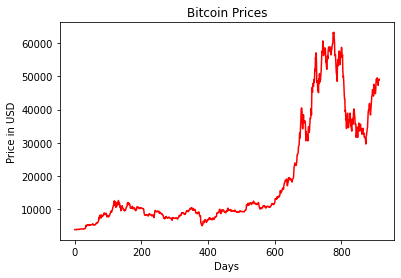

In [9]:
#coindesk에서 다운로드한 비트코인 가격 읽기
coindesk_data = pd.read_csv("./atm모델연습/lstm이해/BTC_USD_2019-03-01_2021-08-30-CoinDesk.csv")
seq = coindesk_data[['Closing Price (USD)']].to_numpy()
print("데이터 길이ㅣ", len(ClosingPrice),"\n앞쪽 5개 값:", ClosingPrice[0:5])
#[[]]와 []의 차이
# coindesk_Data[['Slosing Price (USD)']]구문에 [[...]]을 사용했다. 
# coindesk_Data['Slosing Price (USD)']와 무슨 차이가 있을까. 
# [[...]]은 [[3][5][7][6]]와 같이 표현되고
# [...]은 [4 5 7 6]으로 표현된다. 
# 현재 네 가지 시세인, 종가, 시가, 고가, 저가 중에서 종가만 취하여 실험을 하기 때문에 백터의 백터인[[...]]
# 와 벡터인[...]의 차이가 두드러지지 않는다. 네 값을 모두 사용하는 다중 채널의 경우는 반드시 벡터의 벡터인[[...]]
# 을 사용해야 한다. 종가만 사용하는 프로그램에서 [[...]] 표현으로 코딩해두면 다중 채널로 확장이 쉬워지기 때문에 더 좋은 프로그램이 된다. 

#그래프로 데이터 확인
plt.plot(ClosingPrice, color = 'red')
plt.title("Bitcoin Prices")
plt.xlabel('Days'); plt.ylabel("Price in USD")
plt.show()

In [11]:
#시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq, window, horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        # 처음숫자에서 마지막숫자를 뺀 후 +1을 해주는 개념
        x = seq[i:(i+window)]
        # 0~window크기만큼
        y = (seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w = 7
h = 1

X,Y = seq2dataset(seq, w, h)
print(X.shape, Y.shape)
print(X[0],Y[0]); print(X[-1], Y[-1])

(907, 7, 1) (907, 1)
[[3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]
 [3848.95636968]] [3859.83998333]
[[48971.61189506]
 [49593.08195852]
 [48190.95205325]
 [48907.5327809 ]
 [47329.14972025]
 [49033.32539607]
 [48768.19008652]] [49184.2085095]


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split

In [13]:
#훈련 집합과 test집합으로 분할
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.7, random_state = 33)

In [19]:
#LSTM 모델 설계와 학습
model = Sequential()
model.add(LSTM(units = 128, activation = 'relu', input_shape = x_train[0].shape))
model.add(Dense(1))
model.compile(loss = 'mae', optimizer = 'adam', metrics = ['mae'])
hist = model.fit(x_train, y_train, epochs = 200, batch_size = 1, validation_data = (x_test, y_test), verbose = 2)

# verbose 학습 중 출력되는 문구를 설정합니다. 
# 0 : 아무 것도 출력하지 않습니다. 
# 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다. 
# 2 : 미니 배치마다 손실 정보를 출력합니다. 

Epoch 1/200
272/272 - 2s - loss: 4834.6245 - mae: 4834.6245 - val_loss: 1484.0447 - val_mae: 1484.0447
Epoch 2/200
272/272 - 1s - loss: 1192.2471 - mae: 1192.2471 - val_loss: 1147.6553 - val_mae: 1147.6553
Epoch 3/200
272/272 - 1s - loss: 1138.3180 - mae: 1138.3180 - val_loss: 1473.1439 - val_mae: 1473.1439
Epoch 4/200
272/272 - 1s - loss: 1105.1245 - mae: 1105.1245 - val_loss: 1186.8530 - val_mae: 1186.8530
Epoch 5/200
272/272 - 1s - loss: 1220.8170 - mae: 1220.8170 - val_loss: 1219.6494 - val_mae: 1219.6494
Epoch 6/200
272/272 - 1s - loss: 1190.3417 - mae: 1190.3417 - val_loss: 1109.2094 - val_mae: 1109.2094
Epoch 7/200
272/272 - 1s - loss: 1255.5859 - mae: 1255.5859 - val_loss: 1160.9108 - val_mae: 1160.9108
Epoch 8/200
272/272 - 1s - loss: 1181.6760 - mae: 1181.6760 - val_loss: 1238.4819 - val_mae: 1238.4819
Epoch 9/200
272/272 - 1s - loss: 1086.0624 - mae: 1086.0624 - val_loss: 1659.0164 - val_mae: 1659.0164
Epoch 10/200
272/272 - 1s - loss: 1119.8119 - mae: 1119.8119 - val_loss: 

272/272 - 1s - loss: 550.0789 - mae: 550.0789 - val_loss: 680.4871 - val_mae: 680.4871
Epoch 83/200
272/272 - 1s - loss: 533.8810 - mae: 533.8810 - val_loss: 581.2466 - val_mae: 581.2466
Epoch 84/200
272/272 - 1s - loss: 574.7461 - mae: 574.7461 - val_loss: 686.1906 - val_mae: 686.1906
Epoch 85/200
272/272 - 1s - loss: 564.9187 - mae: 564.9187 - val_loss: 580.7006 - val_mae: 580.7006
Epoch 86/200
272/272 - 1s - loss: 520.2669 - mae: 520.2669 - val_loss: 786.8919 - val_mae: 786.8919
Epoch 87/200
272/272 - 1s - loss: 608.6113 - mae: 608.6113 - val_loss: 622.5989 - val_mae: 622.5989
Epoch 88/200
272/272 - 1s - loss: 559.1861 - mae: 559.1861 - val_loss: 598.9277 - val_mae: 598.9277
Epoch 89/200
272/272 - 1s - loss: 521.9893 - mae: 521.9893 - val_loss: 581.1109 - val_mae: 581.1109
Epoch 90/200
272/272 - 1s - loss: 566.9473 - mae: 566.9473 - val_loss: 660.9602 - val_mae: 660.9602
Epoch 91/200
272/272 - 1s - loss: 498.1045 - mae: 498.1045 - val_loss: 705.6174 - val_mae: 705.6174
Epoch 92/200


Epoch 164/200
272/272 - 1s - loss: 523.4224 - mae: 523.4224 - val_loss: 597.3771 - val_mae: 597.3771
Epoch 165/200
272/272 - 1s - loss: 555.6811 - mae: 555.6811 - val_loss: 646.0970 - val_mae: 646.0970
Epoch 166/200
272/272 - 1s - loss: 546.4693 - mae: 546.4693 - val_loss: 592.5766 - val_mae: 592.5766
Epoch 167/200
272/272 - 1s - loss: 543.3052 - mae: 543.3052 - val_loss: 872.0164 - val_mae: 872.0164
Epoch 168/200
272/272 - 1s - loss: 551.2905 - mae: 551.2905 - val_loss: 699.4576 - val_mae: 699.4576
Epoch 169/200
272/272 - 1s - loss: 519.6843 - mae: 519.6843 - val_loss: 622.7297 - val_mae: 622.7297
Epoch 170/200
272/272 - 1s - loss: 552.8765 - mae: 552.8765 - val_loss: 595.1113 - val_mae: 595.1113
Epoch 171/200
272/272 - 1s - loss: 517.1981 - mae: 517.1981 - val_loss: 606.5298 - val_mae: 606.5298
Epoch 172/200
272/272 - 1s - loss: 550.6248 - mae: 550.6248 - val_loss: 666.1874 - val_mae: 666.1874
Epoch 173/200
272/272 - 1s - loss: 540.4120 - mae: 540.4120 - val_loss: 637.9824 - val_mae:

In [22]:
#lstm 모델 평가
ev = model.evaluate(x_test, y_test, verbose = 0)
print("손실함수:", ev[0], "MAE:", ev[1])

손실함수: 598.3444213867188 MAE: 598.3444213867188


In [25]:
#lstm 모델로 예측 수행
pred = model.predict(x_test)
print("평균절댓값백분율오차(MAPE):", sum(abs(y_test-pred)/y_test)/len(x_test))

평균절댓값백분율오차(MAPE): [0.02826973]


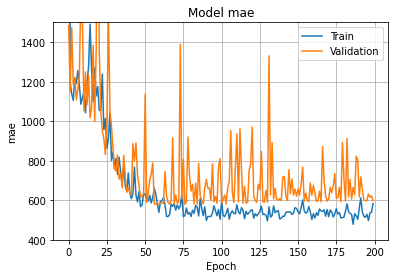

In [39]:
#학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title("Model mae")
plt.ylabel("mae")
plt.xlabel("Epoch")
plt.ylim([400,1500])
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

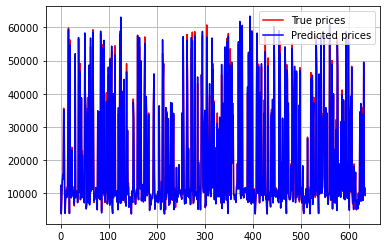

In [51]:
#예측 결과 시각화
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color = 'red')
plt.plot(x_range, pred[x_range], color = 'blue')
plt.legend(['True prices', 'Predicted prices'], loc = 'best')
plt.grid()
plt.show()

In [44]:
x_range

range(0, 635)

In [45]:
len(y_test)

635

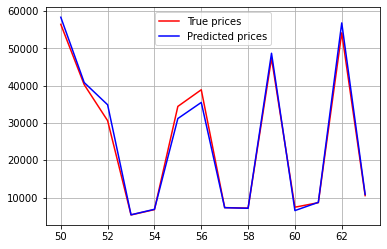

In [47]:
#일부 구간을 확대하여 시각화
x_range = range(50, 64)
plt.plot(x_range, y_test[x_range], color = 'red')
plt.plot(x_range, pred[x_range], color = 'blue')
plt.legend(['True prices', 'Predicted prices'], loc = 'best')
plt.grid()
plt.show()

# 4개의 채널로 확장하기 

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
#코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f = open("./atm모델연습/lstm이해/BTC_USD_2019-03-02_2020-02-28-CoinDesk.csv", 'r')
coindesk_data = pd.read_csv(f, header = 0)
coindesk_data

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-03-02,3811.611979,3799.367026,3840.044823,3788.918498
1,BTC,2019-03-03,3804.419170,3806.691513,3819.194356,3759.409216
2,BTC,2019-03-04,3782.664101,3807.845756,3818.695481,3766.242048
3,BTC,2019-03-05,3689.862893,3783.355063,3804.353616,3663.477743
4,BTC,2019-03-06,3832.080885,3701.049871,3866.718704,3688.697154
...,...,...,...,...,...,...
359,BTC,2020-02-24,9919.551448,9689.085992,10008.540472,9666.519497
360,BTC,2020-02-25,9640.469505,9921.048562,10008.378491,9480.185942
361,BTC,2020-02-26,9392.869629,9640.468562,9679.595090,9251.115834
362,BTC,2020-02-27,8787.978363,9392.868579,9393.864137,8626.935746


In [101]:
seq = coindesk_data[['Closing Price (USD)', '24h Open (USD)', '24h High (USD)', '24h Low (USD)']].to_numpy()
#종가 시가, 고가, 저가를 모두 취한다. 
seq

array([[3811.61197937, 3799.36702601, 3840.04482307, 3788.91849833],
       [3804.41917011, 3806.69151279, 3819.19435612, 3759.40921647],
       [3782.66410112, 3807.84575592, 3818.69548135, 3766.24204823],
       ...,
       [9392.86962872, 9640.46856211, 9679.59508978, 9251.11583368],
       [8787.97836316, 9392.86857947, 9393.86413691, 8626.93574633],
       [8784.99535244, 8790.3368532 , 8977.58556492, 8530.49637938]])

In [102]:
#시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq, window, horizon):
    X = []; Y = []
    for i in range(len(seq)-(window+horizon)+1):
        x = seq[i : (i+window)]
        y = (seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

In [103]:
w = 7
h = 1
# 윈도우 7일
# 1일치 예측

X,Y = seq2dataset(seq, w, h)
print(X.shape, Y.shape)
print(X[0], Y[0])

(357, 7, 4) (357, 4)
[[3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]
 [3848.95636968 3832.59242908 3881.96576977 3802.51605364]
 [3859.83998333 3848.95636731 3890.74549236 3827.67030348]] [3828.37190407 3859.80061624 3917.99756579 3778.51648133]


In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split

In [105]:
split = int(len(X)*0.7)
x_train = X[0:split]; y_train = Y[0:split]
x_test = X[split:]; y_test = Y[split:]

In [106]:
model = Sequential()
model.add(LSTM(units = 128, activation = 'relu', input_shape = x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae', optimizer = 'adam', metrics = ['mae'])
hist = model.fit(x_train, y_train, epochs = 200, batch_size = 1, validation_data  =(x_test, y_test), verbose = 1)

Epoch 1/200
249/249 [==============================] - 1s 3ms/step - loss: 1218.5060 - mae: 1218.5060 - val_loss: 391.4594 - val_mae: 391.4594
Epoch 2/200
249/249 [==============================] - 1s 2ms/step - loss: 873.9555 - mae: 873.9555 - val_loss: 632.3585 - val_mae: 632.3585
Epoch 3/200
249/249 [==============================] - 1s 2ms/step - loss: 542.1634 - mae: 542.1634 - val_loss: 491.9380 - val_mae: 491.9380
Epoch 4/200
249/249 [==============================] - 1s 2ms/step - loss: 514.0351 - mae: 514.0351 - val_loss: 315.4793 - val_mae: 315.4793
Epoch 5/200
249/249 [==============================] - 1s 2ms/step - loss: 488.6436 - mae: 488.6436 - val_loss: 365.8693 - val_mae: 365.8693
Epoch 6/200
249/249 [==============================] - 1s 2ms/step - loss: 482.8988 - mae: 482.8988 - val_loss: 307.8284 - val_mae: 307.8284
Epoch 7/200
249/249 [==============================] - 1s 2ms/step - loss: 476.4337 - mae: 476.4337 - val_loss: 298.8581 - val_mae: 298.8581
Epoch 8/200

Epoch 59/200
249/249 [==============================] - 1s 2ms/step - loss: 184.0511 - mae: 184.0511 - val_loss: 129.5697 - val_mae: 129.5697
Epoch 60/200
249/249 [==============================] - 1s 2ms/step - loss: 188.3013 - mae: 188.3013 - val_loss: 113.6421 - val_mae: 113.6421
Epoch 61/200
249/249 [==============================] - 1s 2ms/step - loss: 175.0734 - mae: 175.0734 - val_loss: 139.9809 - val_mae: 139.9809
Epoch 62/200
249/249 [==============================] - 1s 2ms/step - loss: 179.1954 - mae: 179.1954 - val_loss: 120.6064 - val_mae: 120.6064
Epoch 63/200
249/249 [==============================] - 1s 2ms/step - loss: 183.5927 - mae: 183.5927 - val_loss: 118.5448 - val_mae: 118.5448
Epoch 64/200
249/249 [==============================] - 1s 2ms/step - loss: 179.5132 - mae: 179.5132 - val_loss: 127.6980 - val_mae: 127.6980
Epoch 65/200
249/249 [==============================] - 1s 2ms/step - loss: 178.4535 - mae: 178.4535 - val_loss: 135.4031 - val_mae: 135.4031
Epoch 

249/249 [==============================] - 1s 2ms/step - loss: 181.0140 - mae: 181.0140 - val_loss: 124.5518 - val_mae: 124.5518
Epoch 117/200
249/249 [==============================] - 1s 2ms/step - loss: 174.3623 - mae: 174.3623 - val_loss: 153.6194 - val_mae: 153.6194
Epoch 118/200
249/249 [==============================] - 1s 2ms/step - loss: 172.4163 - mae: 172.4163 - val_loss: 117.4268 - val_mae: 117.4268
Epoch 119/200
249/249 [==============================] - 1s 2ms/step - loss: 179.3963 - mae: 179.3963 - val_loss: 115.6183 - val_mae: 115.6183
Epoch 120/200
249/249 [==============================] - 1s 2ms/step - loss: 233.0604 - mae: 233.0604 - val_loss: 262.9923 - val_mae: 262.9923
Epoch 121/200
249/249 [==============================] - 1s 2ms/step - loss: 191.3750 - mae: 191.3750 - val_loss: 139.9219 - val_mae: 139.9219
Epoch 122/200
249/249 [==============================] - 1s 2ms/step - loss: 179.1028 - mae: 179.1028 - val_loss: 145.1710 - val_mae: 145.1710
Epoch 123/200

249/249 [==============================] - 1s 2ms/step - loss: 170.4303 - mae: 170.4303 - val_loss: 129.8039 - val_mae: 129.8039
Epoch 174/200
249/249 [==============================] - 1s 2ms/step - loss: 170.7041 - mae: 170.7041 - val_loss: 134.5995 - val_mae: 134.5995
Epoch 175/200
249/249 [==============================] - 1s 2ms/step - loss: 168.0908 - mae: 168.0908 - val_loss: 109.5996 - val_mae: 109.5996
Epoch 176/200
249/249 [==============================] - 1s 2ms/step - loss: 176.3623 - mae: 176.3623 - val_loss: 110.0592 - val_mae: 110.0592
Epoch 177/200
249/249 [==============================] - 1s 2ms/step - loss: 187.8754 - mae: 187.8754 - val_loss: 181.3486 - val_mae: 181.3486
Epoch 178/200
249/249 [==============================] - 1s 2ms/step - loss: 175.9649 - mae: 175.9649 - val_loss: 109.5789 - val_mae: 109.5789
Epoch 179/200
249/249 [==============================] - 1s 3ms/step - loss: 168.9665 - mae: 168.9665 - val_loss: 138.9425 - val_mae: 138.9425
Epoch 180/200

In [107]:
#LSTM 모델 평가
ev = model.evaluate(x_test, y_test, verbose = 0)
print("손실 함수:", ev[0], 'MAE:' , ev[1])

손실 함수: 115.26054382324219 MAE: 115.26054382324219


In [110]:
#LSTM 모델로 예측 수행
pred = model.predict(x_test)
print("LSTM 평균절댓값백분율오차(MAPE):", sum(abs(y_test-pred)/y_test)/len(x_test))

LSTM 평균절댓값백분율오차(MAPE): [0.0222922  0.00312405 0.01571642 0.01489311]


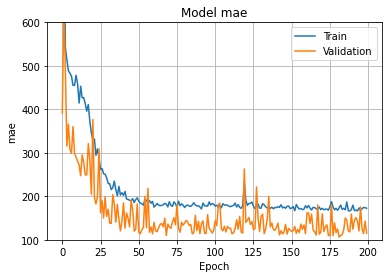

In [112]:
#학습곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

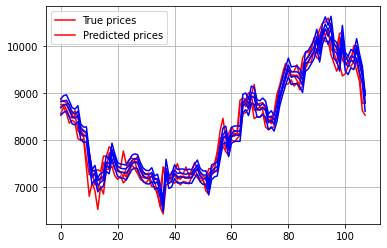

In [114]:
#예측 결과 시각화
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color = 'red')
plt.plot(x_range, pred[x_range], color = 'blue')
plt.legend(['True prices', 'Predicted prices'], loc = 'best')
plt.grid()
plt.show()

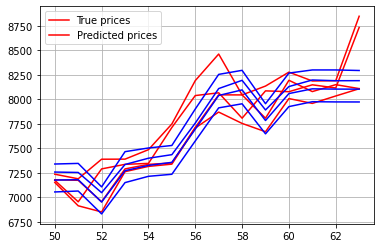

In [116]:
#일부 구간을 확대하여 시각화
x_range = range(50, 64)
plt.plot(x_range, y_test[x_range], color = 'red')
plt.plot(x_range, pred[x_range], color = 'blue')
plt.legend(["True prices", 'Predicted prices'], loc = 'best')
plt.grid()
plt.show()